In [1]:
#Primero cargo las librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
#ahora cargo el data set


In [2]:
from google.colab import files

uploaded = files.upload()

Saving dataset_regresion_multiple.csv to dataset_regresion_multiple.csv


In [3]:
PATH = "dataset_regresion_multiple.csv"

# lee con ; y convierte a numérico
df = pd.read_csv(PATH, sep=";")

# por si algún valor vino como texto con comas/espacios
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              100 non-null    int64  
 1   horas_ejercicio   100 non-null    int64  
 2   peso              100 non-null    int64  
 3   estres            100 non-null    int64  
 4   ingresos          100 non-null    int64  
 5   horas_tv          100 non-null    int64  
 6   presion_arterial  100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


(   edad  horas_ejercicio  peso  estres  ingresos  horas_tv  presion_arterial
 0    58                7    81       1     21150        12             73.83
 1    48                2    55       1     94740        22             82.26
 2    34                2    81       3     86617        24             90.47
 3    62                0    53       6     36896        34             93.49
 4    27                4    60       7     66175        29             65.74,
 None)

In [4]:
display(df.describe())
print("Nulos por columna:\n", df.isna().sum())

corr = df.corr(numeric_only=True)
print("\nCorrelación con la presión:")
print(corr["presion_arterial"].sort_values(ascending=False))


,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,41.600000,4.370000,73.28000,4.700000,59778.350000,19.760000,85.395000
std,13.311346,3.013957,14.29917,2.512595,23603.253158,11.136545,20.531869
min,20.000000,0.000000,50.00000,1.000000,20412.000000,0.000000,38.140000
25%,30.000000,2.000000,60.00000,3.000000,38042.000000,11.000000,72.045000
50%,41.500000,4.000000,73.00000,5.000000,58634.500000,18.500000,84.415000
75%,53.250000,7.000000,84.00000,7.000000,80475.250000,28.250000,98.465000
max,64.000000,9.000000,99.00000,9.000000,99605.000000,39.000000,137.270000


Nulos por columna:
 edad                0
horas_ejercicio     0
peso                0
estres              0
ingresos            0
horas_tv            0
presion_arterial    0
dtype: int64

Correlación con la presión:
presion_arterial    1.000000
peso                0.588843
edad                0.418731
estres              0.366368
horas_tv            0.040789
ingresos           -0.009394
horas_ejercicio    -0.358865
Name: presion_arterial, dtype: float64


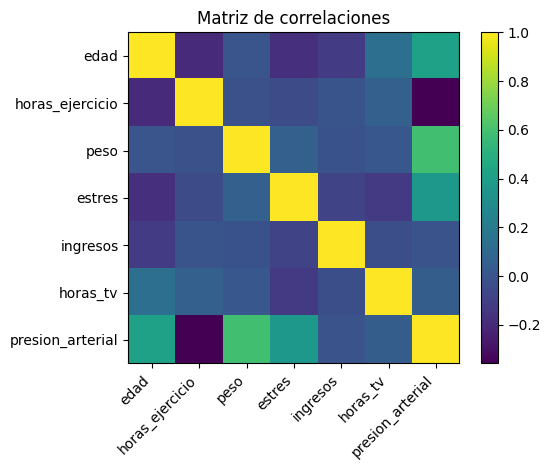

In [5]:
#mapa de correlacion
cols = corr.columns.tolist()
plt.figure()
im = plt.imshow(corr.values, cmap="viridis")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(cols)), cols, rotation=45, ha="right")
plt.yticks(range(len(cols)), cols)
plt.title("Matriz de correlaciones")
plt.tight_layout()
plt.show()

In [6]:
#entrenamos el modelo
from sklearn.model_selection import train_test_split

y = df["presion_arterial"]
X = df.drop(columns=["presion_arterial"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape


((80, 6), (20, 6))

In [8]:
pred = base.predict(X_test)

mse  = mean_squared_error(y_test, pred)   # sin 'squared'
rmse = np.sqrt(mse)                       # RMSE = sqrt(MSE)
mae  = mean_absolute_error(y_test, pred)
r2   = r2_score(y_test, pred)

print(f"BASE LinearRegression -> RMSE={rmse:.3f}  MAE={mae:.3f}  R²={r2:.3f}")

BASE LinearRegression -> RMSE=10.362  MAE=8.600  R²=0.708


In [9]:
#modelo 2

# definimos las variables que queremos usar
features = ["edad","peso","estres","horas_ejercicio"]

# armamos el pipeline
pipe = Pipeline([("scale", StandardScaler()), ("lin", LinearRegression())])
pipe.fit(X_train[features], y_train)

# predecimos
pred = pipe.predict(X_test[features])

# métricas
mse  = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, pred)
r2   = r2_score(y_test, pred)

print(f"Modelo con {features} -> RMSE={rmse:.3f}  MAE={mae:.3f}  R²={r2:.3f}")

Modelo con ['edad', 'peso', 'estres', 'horas_ejercicio'] -> RMSE=9.725  MAE=8.228  R²=0.743


In [10]:
# modelo 3
features = ["ingresos","horas_tv"]

pipe = Pipeline([("scale", StandardScaler()), ("lin", LinearRegression())])
pipe.fit(X_train[features], y_train)

pred = pipe.predict(X_test[features])

mse  = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, pred)
r2   = r2_score(y_test, pred)

print(f"Modelo con {features} -> RMSE={rmse:.3f}  MAE={mae:.3f}  R²={r2:.3f}")


Modelo con ['ingresos', 'horas_tv'] -> RMSE=20.136  MAE=16.773  R²=-0.104


In [11]:
#modelo 4
features = ["edad","peso"]

pipe = Pipeline([("scale", StandardScaler()), ("lin", LinearRegression())])
pipe.fit(X_train[features], y_train)

pred = pipe.predict(X_test[features])

mse  = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, pred)
r2   = r2_score(y_test, pred)

print(f"Modelo con {features} -> RMSE={rmse:.3f}  MAE={mae:.3f}  R²={r2:.3f}")


Modelo con ['edad', 'peso'] -> RMSE=13.316  MAE=10.990  R²=0.517
